In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
# Add the path to the utils folder to sys.path
utils_path = Path('../python').resolve()
sys.path.append(str(utils_path))


import rasterio
import numpy as np
from pathlib import Path
from process_utils import (preprocess_data,
                           superpixel_segmentation)
from rio_utils import (reproject_arr_to_match_profile)

In [2]:
# === Load Alpha-1 Image ===
def open_one(path):
    with rasterio.open(path) as ds:
        band = ds.read(1)  # Read the first band
        profile = ds.profile
    return band, profile

In [3]:
tifs = [
    Path("/shared/Wildfire/Bety_wildfire_project/Bety_data_test/rectangle_45km_40km/pre_merged_alpha_image_rectangle.tif"),
    Path("/shared/Wildfire/Bety_wildfire_project/Bety_data_test/post_rectangle_45km_40km/post_merged_alpha_image_test.tif"),
    # Path("/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Slope/cropped_slope_test.tif")
]
tifs

[PosixPath('/shared/Wildfire/Bety_wildfire_project/Bety_data_test/rectangle_45km_40km/pre_merged_alpha_image_rectangle.tif'),
 PosixPath('/shared/Wildfire/Bety_wildfire_project/Bety_data_test/post_rectangle_45km_40km/post_merged_alpha_image_test.tif')]

In [4]:
# Open both images
bands, profiles = zip(*map(open_one, tifs))
alpha_pre = bands[0]
alpha_post = bands[1]
profile_pre = profiles[0]
profile_post = profiles[1]

In [10]:
print("pre_alpha1", alpha_pre.shape)

pre_alpha1 (5839, 7290)


In [11]:
print("pre_alpha1", alpha_post.shape)

pre_alpha1 (5839, 7290)


Preprocess the image
Applies interpolation, clipping, total-variation denoising, and background mask

Parameters

interpolation (bool): whether or not to perform nearest neighbor interpolation for the preprocessing
weight (float): denoising weight. The greater the weight, the more denoising (at the expense of fidelity to image).

In [5]:
interpolation = True
weight = 5

In [6]:
# === Step 3: Preprocess (Interpolation, Denoising) ===
alpha_pre = preprocess_data(alpha_pre, interpolation, weight)
alpha_post = preprocess_data(alpha_post, interpolation, weight)
print("Preprocessing done")

Preprocessing done


In [ ]:
# # Open both images
# bands, profiles = zip(*map(open_one, tifs))
# alpha_pre = bands[0]
# slope = bands[1]
# profile_pre = profiles[0]
# profile_slope = profiles[1]

In [7]:
# === Step 4: Reproject post image to match pre ===
alpha_post, _ = reproject_arr_to_match_profile(
    alpha_post, profile_post, profile_pre, resampling='bilinear')
alpha_post = alpha_post[0]  # Get back to 2D
print("Reprojection done")

Reprojection done


In [ ]:
# # === Step 5: Reproject slope image to match pre ===
# slope, _ = reproject_arr_to_match_profile(
#     slope, profile_slope, profile_pre, resampling='bilinear')
# slope = slope[0]  # Get back to 2D
# print("Reprojection done")

In [8]:
print("pre_alpha1", alpha_pre.shape)

pre_alpha1 (5839, 7290)


In [9]:
print("pre_alpha1", alpha_post.shape)

pre_alpha1 (5839, 7290)


In [ ]:
# print("slope", slope.shape)

In [15]:
# === Save Postfire alpha1 ===
post_alpha1_out_path = "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/post_rectangle_45km_40km/post_merged_alpha_image_test_aligned_rectangle.npy"
np.save(post_alpha1_out_path, alpha_post)

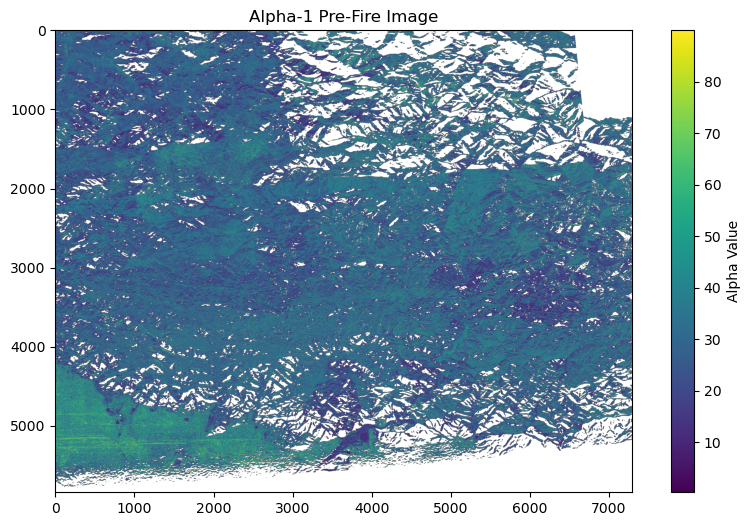

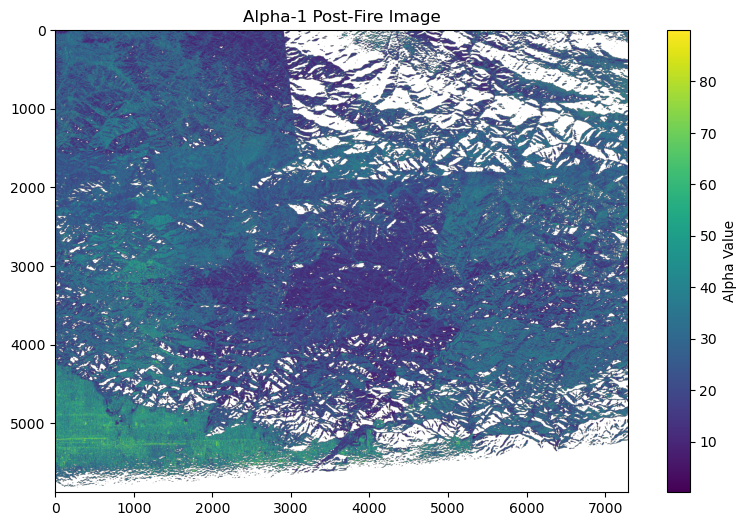

In [12]:
# Load the images
alpha_pre, profile_pre = open_one(tifs[0])
alpha_post, profile_post = open_one(tifs[1])

# Display function
def show_alpha_image(data, title):
    plt.figure(figsize=(10, 6))
    plt.imshow(data)
    plt.colorbar(label="Alpha Value")
    plt.title(title)
    # plt.axis("off")
    plt.show()

# Show the images
show_alpha_image(alpha_pre, "Alpha-1 Pre-Fire Image")
show_alpha_image(alpha_post, "Alpha-1 Post-Fire Image")

In [ ]:

# # Save the file
# output_path = "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/burn_severity_data/post_merged_alpha_image_test_aligned.tif"
# with rasterio.open(output_path, 'w', **profile_out) as dst:
#     dst.write(alpha_post, 1)